In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import pickle as pl
from tqdm import tqdm
from scipy.optimize import minimize
sys.path.append('../')

In [2]:
import binning 

In [3]:
binner = binning.multipole_binning(30,lmin=2,lmax=1024)
def bin_cell(arr):
    return binning.binning(arr,binner)

In [4]:
path = '../Data/paper/recFG.pkl'

In [5]:
dat = pl.load(open(path,'rb'))

In [6]:
l = dat['B']

In [7]:
dat.keys()

dict_keys(['nofg_cl', 'fg2_cl', 'fid', 'fidm', 'NOFG-MCN0', 'fg1-MCN0', 'fg2-MCN0', 'NOFG-MCER', 'fg2-MCER', 'NOFG-MF', 'fg2-MF', 'B'])

In [8]:
nofg_cl = dat['nofg_cl']
fg2_cl = dat['fg2_cl']

In [9]:
std_nofg = nofg_cl.std(axis=0)
std_fg2 = nofg_cl.std(axis=0)

In [10]:
n0_nofg = dat['NOFG-MCN0']
n0_fg2 = dat['fg2-MCN0']

In [11]:
b = dat['B']

In [12]:
fid = dat['fid']
fidm = dat['fidm']

In [13]:
n0_nofg_b = bin_cell(n0_nofg)
n0_fg2_b = bin_cell(n0_fg2)

In [14]:
theory = fid+n0_nofg_b

In [15]:
def chi_sq_nofg(alens,cl):
    return np.sum(((cl-(alens*theory))/(std_nofg))**2)

def chi_sq_fg2(alens,cl):
    return np.sum(((cl-(alens*theory))/(std_fg2))**2)

In [16]:
alens_nofg = [minimize(chi_sq_nofg,1,args=(nofg_cl[i]+n0_nofg_b)).x[0] for i in range(400)]

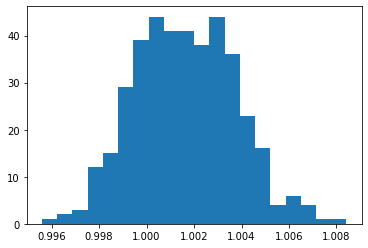

In [17]:
n = plt.hist(alens_nofg,bins=20)

In [18]:
alens_fg2 = [minimize(chi_sq_fg2,1,args=(fg2_cl[i]+n0_fg2_b)).x[0] for i in range(400)]

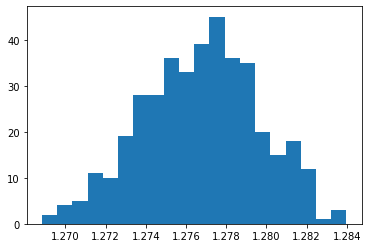

In [33]:
n = plt.hist(alens_fg2,bins=20)

In [32]:
np.std(alens_nofg)

0.0021211556060350993

In [24]:
np.std(alens_fg2)

0.0028899588603886993

In [26]:
1/0.02

50.0